# **Identify which activities should be done**

1. Understand the dataset given
2. Analyze the data using exploratory and visualization
3. Data Preprocessing
4. Data Modeling
5. Conclusion




**Datasets :** https://www.kaggle.com/barun2104/telecom-churn

# **Introduction**

> **Detail Column**

*   Churn: 1 if customer cancelled service, 0 if not
*   AccountWeeks: number of weeks customer has had active account
*   ContractRenewal: 1 if customer recently renewed contract, 0 if not
*   DataPlan: 1 if customer has data plan, 0 if not
*   DataUsage: gigabytes of monthly data usage
*   CustServCalls: number of calls into customer service
*   DayMins: average daytime minutes per month
*   DayCalls: average number of daytime calls
*   MonthlyCharge: average monthly bill
*   OverageFee: largest overage fee in last 12 months
*   RoamMins: average number of roaming minutes





> **Goals**

*   To identify and retain customers who will churn
*   Create a prediction model
*   Comparing which model that match the datasets



In [1]:
# Import Libraries

from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data Overview**

In [2]:
# Import data
df = pd.read_csv('telecom_churn.csv')

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB



*   There are no missing values and categorical variables in the dataset given



In [6]:
!pip install missingno 

In [7]:
import missingno as msno

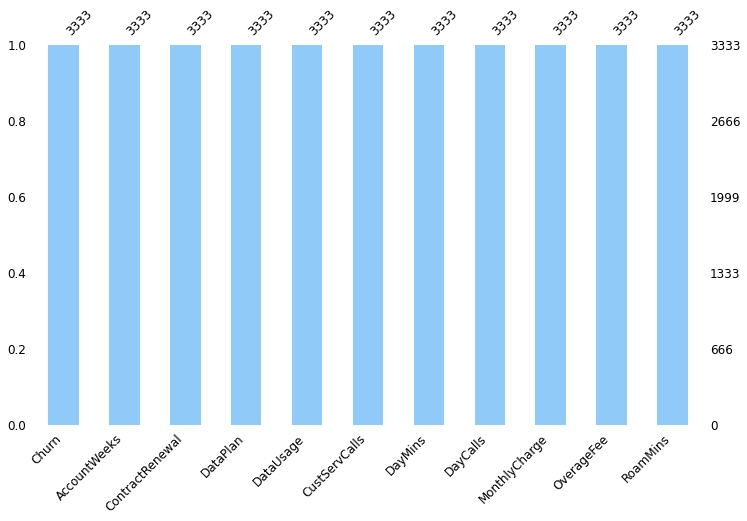

In [8]:
# Missing value handling -> pakai visualisasi
msno.bar(df, color='#90CAf9', figsize=(12,7), fontsize=12)

# **Exploratory Data Analysis (EDA)**

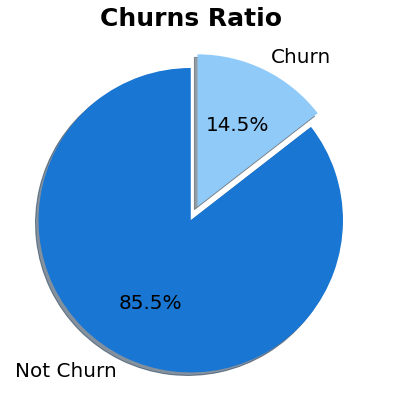

In [9]:
# View the Churns Ratio
labels = ['Not Churn', 'Churn']
sizes = df['Churn'].value_counts(sort = True)

colors = ["#1976D2","#90CAf9"]
explode = (0.1,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Churns Ratio",y=0.9, size=25, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

> **Note:**

*   Data Churn : 14,5%
*   Not Churn : 85,5%




https://seaborn.pydata.org/generated/seaborn.color_palette.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52ad2f5350>,
      dtype=object)

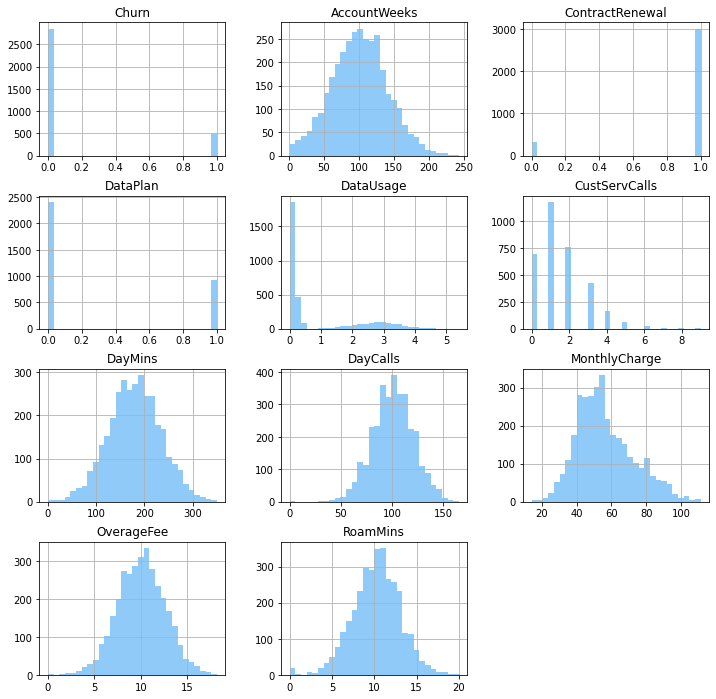

In [10]:
df.hist(figsize=(12,12), bins=30, color='#90CAf9')

> **Note:** This diagram is used for the representation of the data distribution of the Dataframe


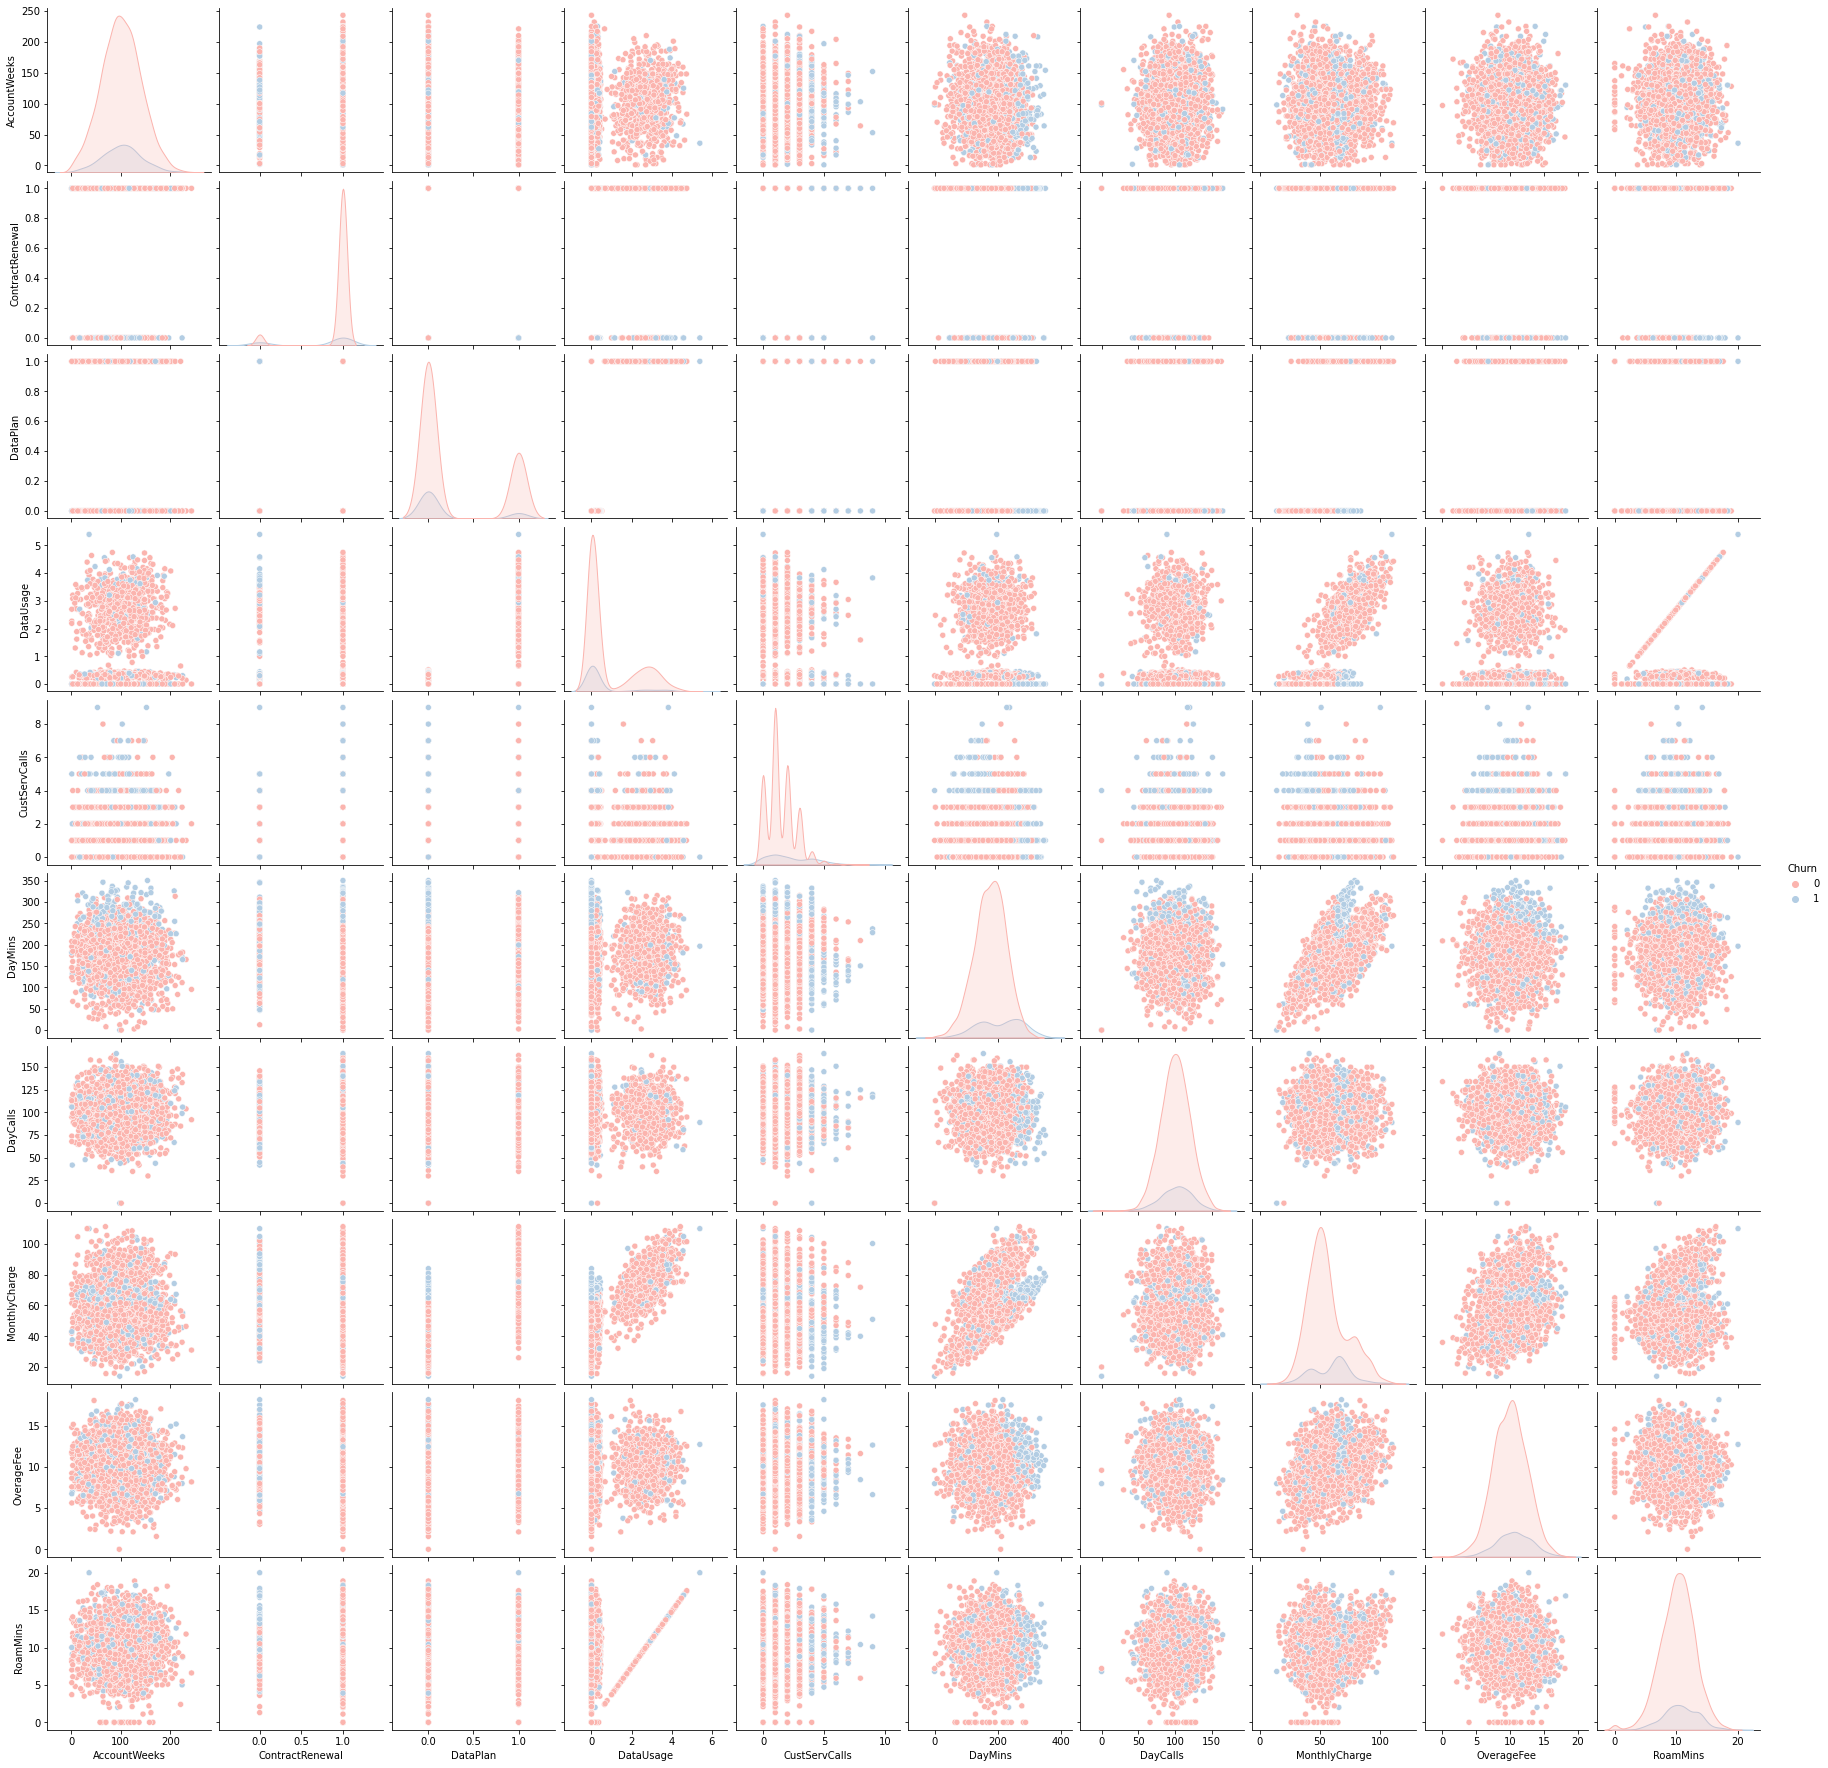

In [11]:
# View at all the numerical variables (using pairplot)
sns.pairplot(df, hue="Churn", palette="Pastel1")

> **Note:**

*   MonthlyCharge has a positive relationship with DataUsage, DayMins, and OverageFee.

*   While the other plots do not have an even distribution and clear direction.

Based on those points above we can see the correlation between variable by using heatmap



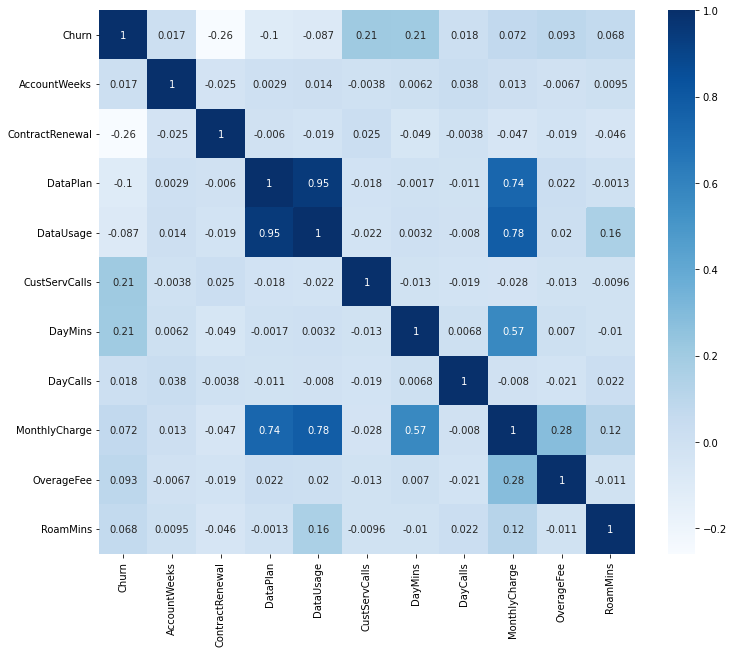

In [12]:
# View the correlation between 2 variable by using heatmap

ax = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

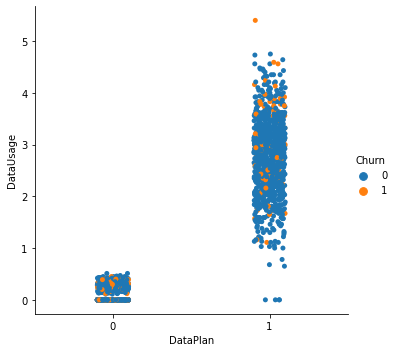

In [13]:
# Catplot -> view the data distribution
sns.catplot(x="DataPlan", y="DataUsage", hue="Churn", data=df)

In [14]:
# Drop Variable
df2 = df.drop(columns = ["DataPlan"])

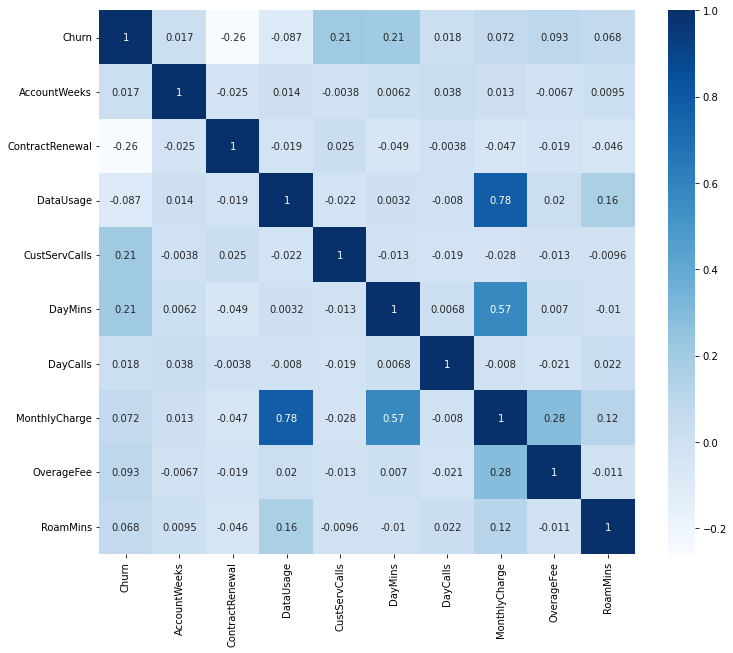

In [15]:
# View the correlation between 2 variable by using heatmap(2)
ax = plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True,cmap="Blues")
plt.show()



> **Note:**


Based on the heatmap above, it can be seen that there is no high correlation between the two variables. So we can use this data for further analysis.

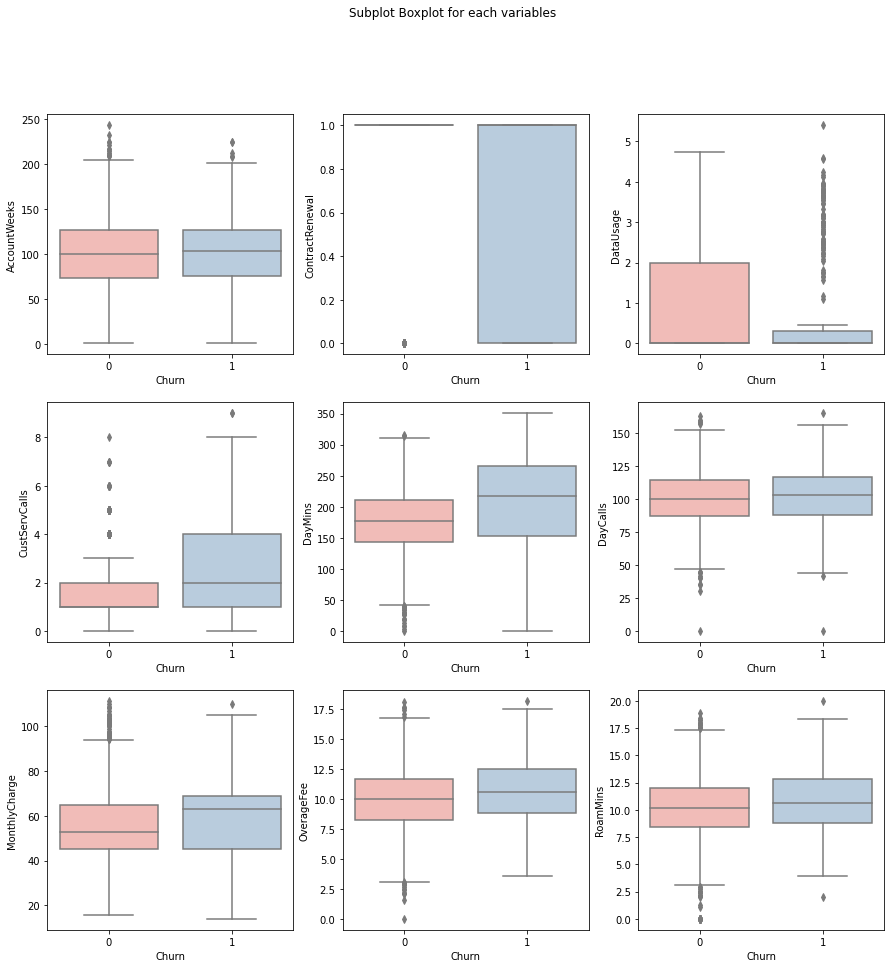

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

fig.suptitle('Subplot Boxplot for each variables')

sns.boxplot(ax=axes[0, 0], data=df2, x='Churn', y='AccountWeeks', palette="Pastel1")
sns.boxplot(ax=axes[0, 1], data=df2, x='Churn', y='ContractRenewal', palette="Pastel1")
sns.boxplot(ax=axes[0, 2], data=df2, x='Churn', y='DataUsage', palette="Pastel1")
sns.boxplot(ax=axes[1, 0], data=df2, x='Churn', y='CustServCalls', palette="Pastel1")
sns.boxplot(ax=axes[1, 1], data=df2, x='Churn', y='DayMins', palette="Pastel1")
sns.boxplot(ax=axes[1, 2], data=df2, x='Churn', y='DayCalls', palette="Pastel1")
sns.boxplot(ax=axes[2, 0], data=df2, x='Churn', y='MonthlyCharge', palette="Pastel1")
sns.boxplot(ax=axes[2, 1], data=df2, x='Churn', y='OverageFee', palette="Pastel1")
sns.boxplot(ax=axes[2, 2], data=df2, x='Churn', y='RoamMins', palette="Pastel1")

# **Data Preprocessing**

In [17]:
import statsmodels.api as sm
sm.datasets.copper.load_pandas()

<class 'statsmodels.datasets.utils.Dataset'>

> **Data Preparation**



In [18]:
df2.describe()

,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [19]:
from collections import Counter

In [20]:
Counter(df2["Churn"])

Counter({0: 2850, 1: 483})

In [21]:
X = df2.drop(columns = ["Churn"])
y = df2["Churn"]

In [22]:
# Spliting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 stratify=y,random_state = 123)

In [23]:
y_train.value_counts()

0    1995
1     338
Name: Churn, dtype: int64



## **Feature Scaling**



In [24]:
# Data Standardization
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['AccountWeeks','ContractRenewal','DataUsage','CustServCalls', 'DayMins', 'DayCalls', 'OverageFee', 'RoamMins']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [25]:
X_train_stand.describe()

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2333.000000,2.333000e+03,2.333000e+03
mean,2.710124e-17,-1.251559e-16,-1.877814e-16,7.257137e-17,-3.059895e-16,-5.667705e-17,56.185555,3.619527e-16,-2.341319e-17
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,16.364240,1.000214e+00,1.000214e+00
min,-2.528855e+00,-2.995010e+00,-6.342977e-01,-1.192867e+00,-3.327787e+00,-5.056367e+00,15.700000,-3.353397e+00,-3.720478e+00
25%,-6.936698e-01,3.338887e-01,-6.342977e-01,-4.293667e-01,-6.416569e-01,-6.450534e-01,45.000000,-6.931524e-01,-6.457278e-01
50%,-1.490268e-02,3.338887e-01,-6.342977e-01,-4.293667e-01,-4.395824e-03,6.617916e-03,53.000000,9.404669e-03,5.395795e-03
75%,6.638645e-01,3.338887e-01,7.271659e-01,3.341337e-01,6.736203e-01,6.582893e-01,66.000000,6.882800e-01,6.565194e-01
max,3.554910e+00,3.338887e-01,3.615357e+00,5.678637e+00,3.170795e+00,3.214846e+00,111.300000,3.210381e+00,3.514229e+00


In [26]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [27]:
X_train_norm2 = pd.DataFrame(X_train_norm)
X_train_norm2.columns = X_train.columns
X_train_norm2

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.371901,1.0,0.000000,0.111111,0.381414,0.369697,0.222803,0.383644,0.525
1,0.314050,1.0,0.575926,0.444444,0.387400,0.709091,0.621339,0.641612,0.575
2,0.400826,1.0,0.600000,0.111111,0.344926,0.636364,0.593096,0.564642,0.600
3,0.954545,1.0,0.025926,0.111111,0.472064,0.630303,0.321130,0.495490,0.590
4,0.380165,1.0,0.550000,0.000000,0.333238,0.727273,0.564854,0.604931,0.550
...,...,...,...,...,...,...,...,...,...
2328,0.541322,1.0,0.000000,0.111111,0.541904,0.636364,0.337866,0.453999,0.650
2329,0.351240,1.0,0.064815,0.000000,0.616591,0.581818,0.500000,0.707156,0.225
2330,0.256198,0.0,0.550000,0.111111,0.567275,0.666667,0.763598,0.782321,0.550
2331,0.669421,1.0,0.000000,0.111111,0.635690,0.727273,0.442469,0.588695,0.440


In [28]:
X_train_norm2.describe()

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,0.415673,0.899700,0.149259,0.173596,0.512079,0.611321,0.423489,0.510894,0.514254
std,0.164407,0.300464,0.235364,0.145560,0.153913,0.120927,0.171174,0.152384,0.138252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,1.000000,0.000000,0.111111,0.413341,0.533333,0.306485,0.405292,0.425000
50%,0.413223,1.000000,0.000000,0.111111,0.511403,0.612121,0.390167,0.512327,0.515000
75%,0.524793,1.000000,0.320370,0.222222,0.615735,0.690909,0.526151,0.615755,0.605000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Imbalanced Dataset**



In [29]:
# X_train = X_train_norm2
X_train = X_train_stand

In [30]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersampling.fit_resample(X_train,y_train)

In [31]:
X_under

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,-0.869646,0.333889,-0.634298,0.334134,-1.306706,1.660861,31.0,-1.158892,0.222437
1,0.085655,0.333889,-0.429685,0.334134,-0.591639,0.106875,47.6,0.427781,0.909734
2,1.518608,0.333889,1.978453,-1.192867,0.090082,1.911503,80.2,-0.353715,0.728866
3,-0.417135,-2.995010,-0.634298,0.334134,-0.263746,0.307389,45.0,-0.101110,-0.247819
4,-0.014903,0.333889,1.640055,-0.429367,-1.365986,1.560603,66.9,0.605394,0.150090
...,...,...,...,...,...,...,...,...,...
671,0.437609,0.333889,-0.634298,-0.429367,1.490574,0.006618,67.0,1.094816,-0.103125
672,-0.040042,0.333889,-0.634298,3.388135,-2.016214,-0.344282,31.0,0.285691,-0.283992
673,-0.115461,0.333889,-0.634298,-1.192867,0.842198,-0.544796,63.0,1.548715,-0.537207
674,0.437609,-2.995010,1.215089,2.624635,-0.363781,-0.294153,69.5,0.167283,-0.573381


In [32]:
y_under

0      0
1      0
2      0
3      0
4      0
      ..
671    1
672    1
673    1
674    1
675    1
Name: Churn, Length: 676, dtype: int64

In [33]:
Counter(y_under)

Counter({0: 338, 1: 338})

In [34]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversampling.fit_resample(X_train,y_train)

In [35]:
X_over

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,-0.266298,0.333889,-0.634298,-0.429367,-0.849137,-1.998525,37.0,-0.835243,0.077743
1,-0.618251,0.333889,1.813189,1.861135,-0.810235,0.808675,75.1,0.857999,0.439478
2,-0.090321,0.333889,1.915495,-0.429367,-1.086258,0.207132,72.4,0.352789,0.620346
3,3.278375,0.333889,-0.524121,-0.429367,-0.260041,0.157004,46.4,-0.101110,0.547999
4,-0.216019,0.333889,1.703013,-1.192867,-1.162210,0.959061,69.7,0.617235,0.258611
...,...,...,...,...,...,...,...,...,...
3985,0.663864,0.333889,-0.634298,-0.429367,0.894068,1.460346,65.0,2.002614,-1.730934
3986,1.719724,0.333889,-0.634298,-0.429367,1.964815,-2.850710,63.0,-0.661577,-0.573381
3987,-0.190879,0.333889,-0.634298,1.861135,-0.402684,0.207132,41.0,-0.910235,-0.826595
3988,0.513027,-2.995010,-0.634298,-1.192867,0.949643,1.560603,60.0,0.830370,0.258611


In [36]:
y_over

0       0
1       1
2       0
3       0
4       0
       ..
3985    1
3986    1
3987    1
3988    1
3989    1
Name: Churn, Length: 3990, dtype: int64

In [37]:
Counter(y_over)

Counter({0: 1995, 1: 1995})

In [38]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [39]:
X_smote

,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,-0.266298,0.333889,-0.634298,-0.429367,-0.849137,-1.998525,37.000000,-0.835243,0.077743
1,-0.618251,0.333889,1.813189,1.861135,-0.810235,0.808675,75.100000,0.857999,0.439478
2,-0.090321,0.333889,1.915495,-0.429367,-1.086258,0.207132,72.400000,0.352789,0.620346
3,3.278375,0.333889,-0.524121,-0.429367,-0.260041,0.157004,46.400000,-0.101110,0.547999
4,-0.216019,0.333889,1.703013,-1.192867,-1.162210,0.959061,69.700000,0.617235,0.258611
...,...,...,...,...,...,...,...,...,...
3985,-0.614936,0.333889,-0.634298,1.401666,-1.029905,-0.590945,37.000000,-0.459494,0.174406
3986,-1.848068,0.333889,-0.634298,-0.429367,-1.380192,-0.976425,33.076303,-0.553131,-1.182738
3987,0.941644,-2.995010,-0.608880,-0.429367,-0.063135,0.389277,45.074533,-0.673295,-1.056442
3988,0.126206,0.333889,-0.634298,-1.100783,0.392330,-0.111777,57.060304,1.232539,-0.276538


In [40]:
y_smote

0       0
1       1
2       0
3       0
4       0
       ..
3985    1
3986    1
3987    1
3988    1
3989    1
Name: Churn, Length: 3990, dtype: int64

In [41]:
Counter(y_smote)

Counter({0: 1995, 1: 1995})

In [42]:
X_train,y_train = X_smote, y_smote



## **Modeling**



In [43]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [44]:
# Create confusion matrix visualization
def confusion_matrix_heatmap(conf_mat):
    conf_mat_prop = conf_mat / conf_mat.sum()
    conf_mat_prop = pd.DataFrame(conf_mat_prop)

    _ = sns.heatmap(conf_mat_prop, annot = True, cmap = "Blues", vmin = 0, vmax = 1)
    _.set_title("Proportional Confusion Matrix")
    _.set(xlabel = "Predicted Value", ylabel = "Actual Value")
    
    return plt.show()

In [45]:
# Create AUC visualization
def auc_visualization(y_test_fold, predicted_proba):
    # Create no-skill model
    ns_proba = [0 for _ in range(len(y_test_fold))]
    ns_fpr, ns_tpr, _ = roc_curve(y_true = y_test_fold, y_score = ns_proba)

    model_fpr, model_tpr, _ = roc_curve(y_true = y_test_fold, y_score = predicted_proba)

    _ = plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = "No-skill model")
    _ = plt.plot(model_fpr, model_tpr, marker = ".", label = "Best model")
    _ = plt.title("Receiver Operating Characteristic Curve")
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.legend()
    
    return plt.show()

In [46]:
def modeling(model, X_train, y_train, X_test, model_name):
  result = model.fit(X_train, y_train)

  ## Prediction
  predicted = result.predict(X_test_stand)

  ## Confusion matrix
  conf_mat = confusion_matrix(y_true = y_test, y_pred = predicted)
  TP = conf_mat[0][0]
  TN = conf_mat[1][1]
  FP = conf_mat[0][1]
  FN = conf_mat[1][0]
  print(model_name, "Confusion Matrix:")
  print(conf_mat)
  confusion_matrix_heatmap(conf_mat)
  return predicted



> **KNN**



kNN Confusion Matrix:
[[710 145]
 [ 32 113]]


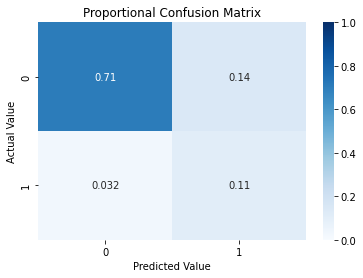

In [47]:
knn = KNeighborsClassifier()
knn_predicted = modeling(knn, X_train, y_train, X_test_stand, 'kNN')



> **Decision Tree**



Decision Tree Confusion Matrix:
[[767  88]
 [ 50  95]]


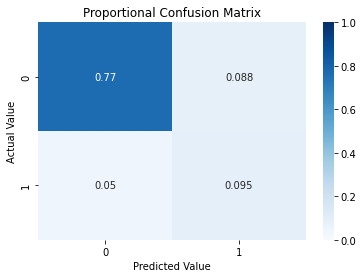

In [48]:
dt = DecisionTreeClassifier(random_state = 123)
dt_predicted = modeling(dt, X_train, y_train, X_test_stand, 'Decision Tree')



> **XGBoost**



XGBoost Confusion Matrix:
[[806  49]
 [ 34 111]]


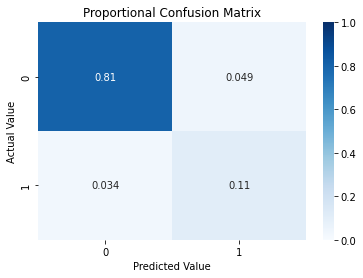

In [49]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_predicted = modeling(xgb_model, X_train, y_train, X_test_stand, 'XGBoost')

> **Logistic Regression**



Logistic Regression Confusion Matrix:
[[661 194]
 [ 34 111]]


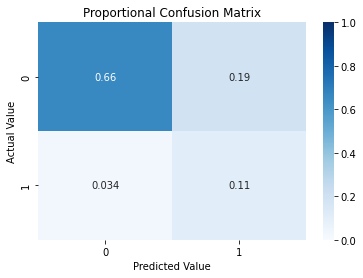

In [50]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
logreg_predicted = modeling(log_model, X_train, y_train, X_test_stand, 'Logistic Regression')



> **Random Forest**



Random Forest Confusion Matrix:
[[817  38]
 [ 35 110]]


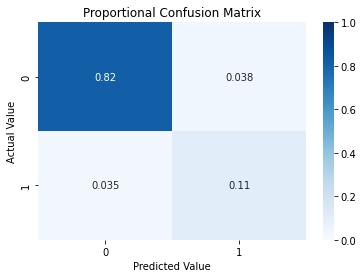

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=35)
rf_predicted = modeling(rf, X_train, y_train, X_test_stand, 'Random Forest')

## **Evaluate the Model**



In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
def evaluate(y_test, y_predicted, model_name):
  accuracy = accuracy_score(y_test, y_predicted)
  precision = precision_score(y_test, y_predicted)
  recall = recall_score(y_test, y_predicted)
  fscore = f1_score(y_test, y_predicted)

  roc_auc = roc_auc_score(y_true = y_test, y_score = y_predicted)
  print(model_name, "Accuracy: " + str(accuracy))
  print(model_name, "Precision: " + str(precision))
  print(model_name, "Recall: " + str(recall))
  print(model_name, "F-Score: " + str(fscore))
  print(model_name, "AUC: " + str(roc_auc))
  auc_visualization(y_test, y_predicted)

KNN Accuracy: 0.823
KNN Precision: 0.437984496124031
KNN Recall: 0.7793103448275862
KNN F-Score: 0.5607940446650125
KNN AUC: 0.8048598507763662


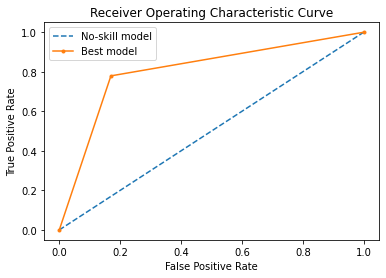

In [54]:
evaluate(y_test, knn_predicted, 'KNN')

Decision Tree Accuracy: 0.862
Decision Tree Precision: 0.5191256830601093
Decision Tree Recall: 0.6551724137931034
Decision Tree F-Score: 0.5792682926829268
Decision Tree AUC: 0.7761242185924582


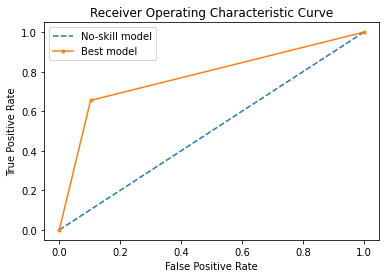

In [55]:
evaluate(y_test, dt_predicted, 'Decision Tree')

XGBoost Accuracy: 0.917
XGBoost Precision: 0.69375
XGBoost Recall: 0.7655172413793103
XGBoost F-Score: 0.7278688524590162
XGBoost AUC: 0.8541036499294212


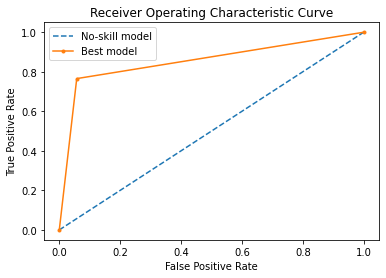

In [56]:
evaluate(y_test, xgb_predicted, 'XGBoost')

Logistic Regression Accuracy: 0.772
Logistic Regression Precision: 0.3639344262295082
Logistic Regression Recall: 0.7655172413793103
Logistic Regression F-Score: 0.49333333333333346
Logistic Regression AUC: 0.7693083282919944


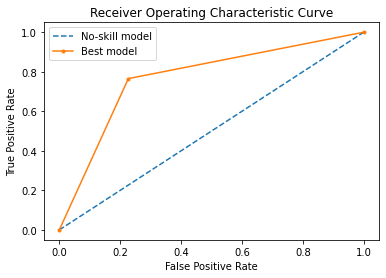

In [57]:
evaluate(y_test, logreg_predicted, 'Logistic Regression')

Random Forest Accuracy: 0.927
Random Forest Precision: 0.7432432432432432
Random Forest Recall: 0.7586206896551724
Random Forest F-Score: 0.7508532423208191
Random Forest AUC: 0.857088122605364


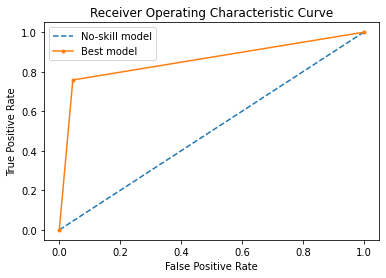

In [58]:
evaluate(y_test, rf_predicted, 'Random Forest')



## **Parameter Tuning**



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [100,200,300,400,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = params,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', params, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}  



In [ ]:
# Test
randmf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 80, bootstrap=False) 
randmf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, n_estimators=200)

Random Forest Confusion Matrix:
[[825  30]
 [ 37 108]]


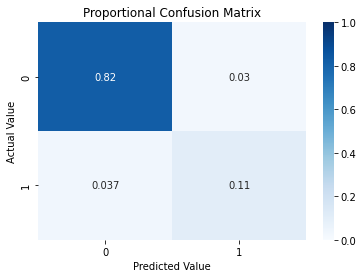

In [ ]:
# evaluate hyperparameter RF
rf_predicted2 = modeling(randmf, X_train, y_train, X_test_stand, 'Random Forest')


Random Forest Accuracy: 0.933
Random Forest Precision: 0.782608695652174
Random Forest Recall: 0.7448275862068966
Random Forest F-Score: 0.7632508833922261
Random Forest AUC: 0.8548699334543255


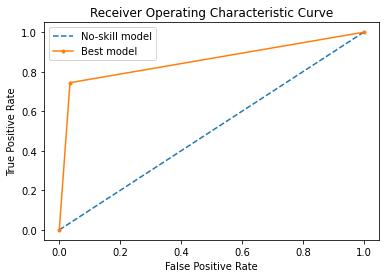

In [ ]:
# performance RF Model
evaluate(y_test, rf_predicted2, 'Random Forest')

> **View the most important variable on the datasets**



In [ ]:
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

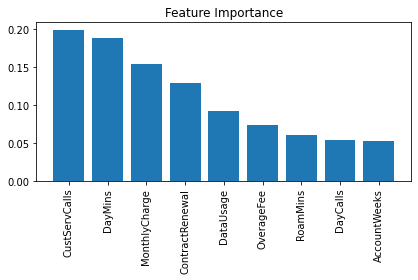

In [ ]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Conclusion


*   Best Model: XGBoost and Random Forest

*   The most important variable on the datasets are CustServCalls, DayMins and MonthlyCharge

*   Need Customer Segmentation, and Reminder for Data Plan Usage







